<a href="https://colab.research.google.com/github/anand1994sp/MACHINE-LEARNING-PROJECTS/blob/main/ANAND_ML_Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
%matplotlib inline

In [236]:
df=pd.read_csv("/content/bank.csv",sep=";")

In [237]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Bank client data:
1) age (numeric)

2) job: type of
job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","selfemployed","services","student","technician","unemployed","unknown")

3) marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced"
means divorced or widowed)

4) education: education of individual (categorical:
"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","u
nknown")

5) default: has credit in default? (categorical: "no","yes","unknown")

6) housing: has housing loan? (categorical: "no","yes","unknown")

7) loan: has personal loan? (categorical: "no","yes","unknown")
Related with the last contact of the current campaign:

8) contact: contact communication type (categorical: "cellular","telephone")

9) month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

10) dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly
affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known. Thus, this input should only be
included for benchmark purposes and should be discarded if the intention is to have a realistic
Other attributes:
12) campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact)

13) pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric; 999 means client was not previously contacted)

14) previous: number of contacts performed before this campaign and for this client (numeric)

15) poutcome: outcome of the previous marketing campaign (categorical:
"failure","nonexistent","success")
Social and economic context attributes

16) emp.var.rate: employment variation rate - quarterly indicator (numeric)

17) cons.price.idx: consumer price index - monthly indicator (numeric)

18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19) concavepoints_se: standard error for number of concave portions of the contour

20) euribor3m: euribor 3 month rate - daily indicator (numeric)

21) nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):

22) y: has the client subscribed a term deposit? (binary: "yes","no")

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [239]:
df.isna().sum().sum()

0

 **Q1. What does the primary analysis of several categorical
features reveal?**

In [240]:
df.select_dtypes(include=["object_"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [241]:
Categorical_features=df.select_dtypes(include=["object_"]).columns
Categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [242]:
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [243]:
for i in Categorical_features:
  print(f"{i.upper()} :-")
  print(df[i].value_counts())
  print("")

JOB :-
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

MARITAL :-
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

EDUCATION :-
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

DEFAULT :-
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

HOUSING :-
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

LOAN :-
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

CONTACT :-
cellular     26144
telepho

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


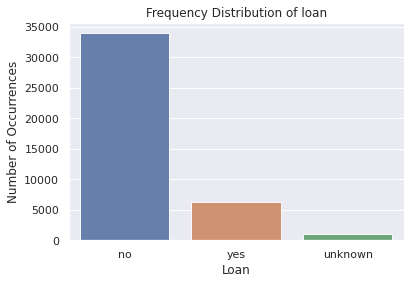

In [244]:
loan_count = df['loan'].value_counts()
sns.set(style="darkgrid")
sns.barplot(loan_count.index, loan_count.values, alpha=0.9)
plt.title('Frequency Distribution of loan')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan', fontsize=12)
plt.show()

***After Primary analysis we notice following:***

***1.Many feature have unknown variable***

***2.The Dependent variable y is not balanced***

***3.In Default feature know yes is only 3 while unknown in 8597***


**Q2**. **Perform the following Exploratory Data Analysis tasks:**

a. Missing Value Analysis

b. Label Encoding wherever required

c. Selecting important features based on Random Forest

d. Handling unbalanced data using SMOTE

e. Standardize the data using the anyone of the scalers
provided by sklearn 

In [245]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [246]:
df.isna().sum().sum()

0

***a)The missing values is already handled by replacing it with unknow in the dataset ***

In [247]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [248]:
df1=df.copy()

In [249]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [250]:
for i in Categorical_features:
  df1[i]=le.fit_transform(df1[i])

*** b) All categorical values are label encoded to avoid misunderstanding it will be further onehot encoder using get dumies***

In [251]:
df1=pd.get_dummies(df1,columns=Categorical_features,drop_first=True)

In [252]:
df1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_1,poutcome_2,y_1
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


In [253]:
x=df1.drop("y_1",axis=1)
y=df1["y_1"]

In [254]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x=ss.transform(x)

*** c)Standard Scalar has been done in the independent variable***

In [255]:
x.shape,y.shape

((41188, 53), (41188,))

In [256]:
y.value_counts()

0    36548
1     4640
Name: y_1, dtype: int64

In [257]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [258]:
x,y=smote.fit_resample(x,y)

In [259]:
x.shape,y.shape

((73096, 53), (73096,))

In [260]:
y.value_counts()

0    36548
1    36548
Name: y_1, dtype: int64

**d)Unbalanced data using SMOTE is handled**

In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [262]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)

In [263]:
sel = SelectFromModel(RandomForestClassifier())
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [264]:
sel.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False])

In [266]:
a=pd.DataFrame(x_train,columns=df1.columns.drop('y_1'))
a.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_1,poutcome_2
0,-0.865939,0.238028,0.517118,0.195414,-0.349494,0.839061,-0.227465,0.951267,0.774152,0.845170,...,-0.70864,-0.332532,-0.133197,-0.118462,-0.510465,-0.514581,-0.494394,2.015858,0.397706,-0.18570
1,4.037590,-0.379856,-0.204909,0.195414,-0.349494,-1.191552,0.352470,1.162700,-1.711091,-2.215215,...,-0.70864,-0.332532,-0.133197,-0.118462,1.711360,-0.514581,-0.494394,-0.496067,0.397706,-0.18570
2,-0.342447,1.272828,-0.565922,0.195414,-0.349494,0.839061,0.591424,-0.474791,0.772515,0.845170,...,-0.70864,-0.332532,-0.133197,-0.118462,-0.510465,-0.514581,1.615646,-0.496067,0.397706,-0.18570
3,1.245157,-0.757050,-0.565922,0.195414,-0.349494,-0.115781,-0.649003,-0.323542,0.328471,0.398115,...,-0.70864,3.007225,-0.133197,-0.118462,1.959000,-0.514581,-0.494394,-0.496067,0.397706,-0.18570
4,0.682200,-0.282702,-0.281926,-5.117342,1.671136,-1.961809,-1.490351,1.621083,-1.679278,-1.986638,...,-0.70864,-0.332532,-0.133197,-0.118462,-0.510465,1.418970,-0.494394,0.039816,-2.514421,5.38503


In [267]:
selected_feat= a.columns[(sel.get_support())]
len(selected_feat)

11

In [268]:
print(selected_feat)

Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'housing_2', 'contact_1',
       'month_6'],
      dtype='object')


In [275]:
x1=pd.DataFrame(x,columns=df1.columns.drop("y_1"))
x1=x1[selected_feat]
x1

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housing_2,contact_1,month_6
0,1.533034,0.010471,-0.565922,0.648092,0.722722,0.886447,0.712460,0.331680,-1.048877,1.318270,1.411155
1,1.628993,-0.421501,-0.565922,0.648092,0.722722,0.886447,0.712460,0.331680,-1.048877,1.318270,1.411155
2,-0.290186,-0.124520,-0.565922,0.648092,0.722722,0.886447,0.712460,0.331680,0.953401,1.318270,1.411155
3,-0.002309,-0.413787,-0.565922,0.648092,0.722722,0.886447,0.712460,0.331680,-1.048877,1.318270,1.411155
4,1.533034,0.187888,-0.565922,0.648092,0.722722,0.886447,0.712460,0.331680,-1.048877,1.318270,1.411155
...,...,...,...,...,...,...,...,...,...,...,...
73091,2.127582,-0.223979,0.055327,-1.322066,0.004216,0.842425,-1.579616,-2.140302,-0.556646,-0.758570,-0.708640
73092,3.562673,0.160262,0.601086,-1.134279,0.881139,0.131084,-1.663345,-2.428157,-1.048877,-0.758570,-0.708640
73093,-0.826821,2.158258,-0.204909,-1.197935,-0.864955,-1.425496,-1.300886,-0.940281,0.953401,0.952836,-0.708640
73094,-0.445611,0.141604,-0.067616,-1.197935,-0.864955,-1.425496,-1.272021,-0.940281,-1.048877,-0.758570,-0.708640


In [276]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=23)

**e)Important features based on Random Forest selected**

**Q3. Build the following Supervised Learning models:**
a. Logistic Regression
b. AdaBoost
c. Naïve Bayes
d. KNN
e. SVM**

In [305]:
Result={"Model":[],"Accuracy":[],"Precision":[],"Recall":[],"f1-score":[]}

In [290]:
# Result=pd.DataFrame(Result)

In [291]:
from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression().fit(x_train,y_train)
from sklearn.ensemble import AdaBoostClassifier
AdaBoostClassifier=AdaBoostClassifier().fit(x_train,y_train)
from sklearn.naive_bayes import GaussianNB
GaussianNB=GaussianNB().fit(x_train,y_train)
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier=KNeighborsClassifier().fit(x_train,y_train)
from sklearn.svm import SVC
SVC=SVC().fit(x_train,y_train)

In [292]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [306]:
for i in (LogisticRegression,AdaBoostClassifier,GaussianNB,KNeighborsClassifier,SVC):
  y_pred=i.predict(x_test)
  Result["Accuracy"].append(accuracy_score(y_test,y_pred))
  Result["Precision"].append(precision_score(y_test,y_pred))
  Result["Recall"].append(recall_score(y_test,y_pred))
  Result["f1-score"].append(f1_score(y_test,y_pred))

In [310]:
Result["Model"]=("LogisticRegression","AdaBoostClassifier","GaussianNB","KNeighborsClassifier","SVC")

In [311]:
Result=pd.DataFrame(Result)
Result

,Model,Accuracy,Precision,Recall,f1-score
0,LogisticRegression,0.869924,0.856268,0.888645,0.872156
1,AdaBoostClassifier,0.908340,0.902779,0.914950,0.908824
2,GaussianNB,0.785542,0.762322,0.828913,0.794224
3,KNeighborsClassifier,0.908066,0.884028,0.939062,0.910714
4,SVC,0.902211,0.861535,0.958132,0.907270


# **All 5 Algorithms are executed and It's Corresponding Metrics is formed**

# **Value of ALL Algorithm and metrics is tabulated **

# ***KNN Model performs better in predicting if the***
# ***client will subscribe to term deposit or not***

# Part II: Time Series

In [327]:
df=pd.read_csv("/content/MonthWiseMarketArrivals_Clean.csv")

In [328]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [316]:
import itertools
df.date = pd.DatetimeIndex(df.date)
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [326]:

df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


Objective:
1) To get the modal price of onion for each month for the Mumbai market
2) To build time series model and check the performance of the model using RMSE
3) To plot ACF and PACF plots
4) To perform Exponential smoothing using Holt-Winter’s technique and to forecast onion price for Mumbai market

In [330]:
# change the index to date column
df.set_index('date', inplace=True)
#df.index = pd.PeriodIndex(df.arrival_date, freq="M")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
January-2005,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
January-2006,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
January-2010,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
January-2011,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
January-2012,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [331]:
df = df.sort_values(by="date")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
April-1996,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
April-1997,LASALGAON(MS),April,1997,223608,149,240,214,MS,LASALGAON
April-1998,PIMPALGAON(MS),April,1998,36792,166,316,235,MS,PIMPALGAON
April-1998,CHAKAN(MS),April,1998,36750,199,281,253,MS,CHAKAN
April-1998,NIPHAD(MS),April,1998,3900,67,304,237,MS,NIPHAD


In [335]:
df.city.unique()

array(['LASALGAON', 'PIMPALGAON', 'CHAKAN', 'NIPHAD', 'SAIKHEDA',
       'LONAND', 'MAHUVA', 'BHAVNAGAR', 'MANMAD', 'SINNAR', 'PUNE',
       'INDORE', 'DINDIGUL', 'BOMBORI', 'DHULIA', 'HUBLI', 'NASIK',
       'DEWAS', 'RAHURI', 'AHMEDNAGAR', 'GONDAL', 'RAJKOT', 'DELHI',
       'KARNAL', 'HASSAN', 'JAIPUR', 'KURNOOL', 'KOLAR', 'KOLHAPUR',
       'SOLAPUR', 'CHICKBALLAPUR', 'YEOLA', 'LUCKNOW', 'BANGALORE',
       'NAGPUR', 'BELGAUM', 'CHENNAI', 'KALVAN', 'MALEGAON', 'SRINAGAR',
       'KANPUR', 'SURAT', 'PATNA', 'KOLKATA', 'SHIMLA', 'HYDERABAD',
       'MUMBAI', 'DHAVANGERE', 'JODHPUR', 'JAMMU', 'GUWAHATI', 'JALGAON',
       'JUNNAR', 'UJJAIN', 'VARANASI', 'SANGAMNER', 'SATANA', 'SANGALI',
       'AGRA', 'BIJAPUR', 'TRIVENDRUM', 'RANCHI', 'AHMEDABAD', 'BHOPAL',
       'DEVALA', 'BHUBNESWER', 'JALANDHAR', 'LUDHIANA', 'AMRITSAR',
       'PATIALA', 'ABOHAR', 'VANI', 'SHRIRAMPUR', 'RAIPUR', 'DINDORI',
       'BHATINDA', 'MANDSOUR', 'UDAIPUR', 'ALWAR', 'DEORIA', 'COIMBATORE',
       'KOTA', '

In [336]:
df2020_mum = df[(df.city =="MUMBAI")]
df2020_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
April-2004,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI
April-2005,MUMBAI,April,2005,286150,238,419,328,MS,MUMBAI
April-2006,MUMBAI,April,2006,253765,240,343,290,MS,MUMBAI
April-2007,MUMBAI,April,2007,235600,434,628,531,MS,MUMBAI
April-2008,MUMBAI,April,2008,218050,356,482,418,MS,MUMBAI


In [337]:
df2020_mum.shape

(146, 9)

In [338]:
pd.set_option("precision", 0)
df2020_mum.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,146,146,146,146
mean,2010,221721,901,1317,1114
std,4,40793,731,1019,883
min,2004,131590,215,335,287
25%,2007,195125,434,648,544
50%,2010,222220,692,982,846
75%,2013,246050,1099,1623,1392
max,2016,413681,4005,5517,4714


In [340]:
df2020_mum = df2020_mum["priceMod"]
df2020_mum.head()

date
April-2004    397
April-2005    328
April-2006    290
April-2007    531
April-2008    418
Name: priceMod, dtype: int64

In [344]:
df2020_mum=pd.DataFrame(df2020_mum)

In [346]:
plt.rcParams['figure.figsize'] = [15,20]

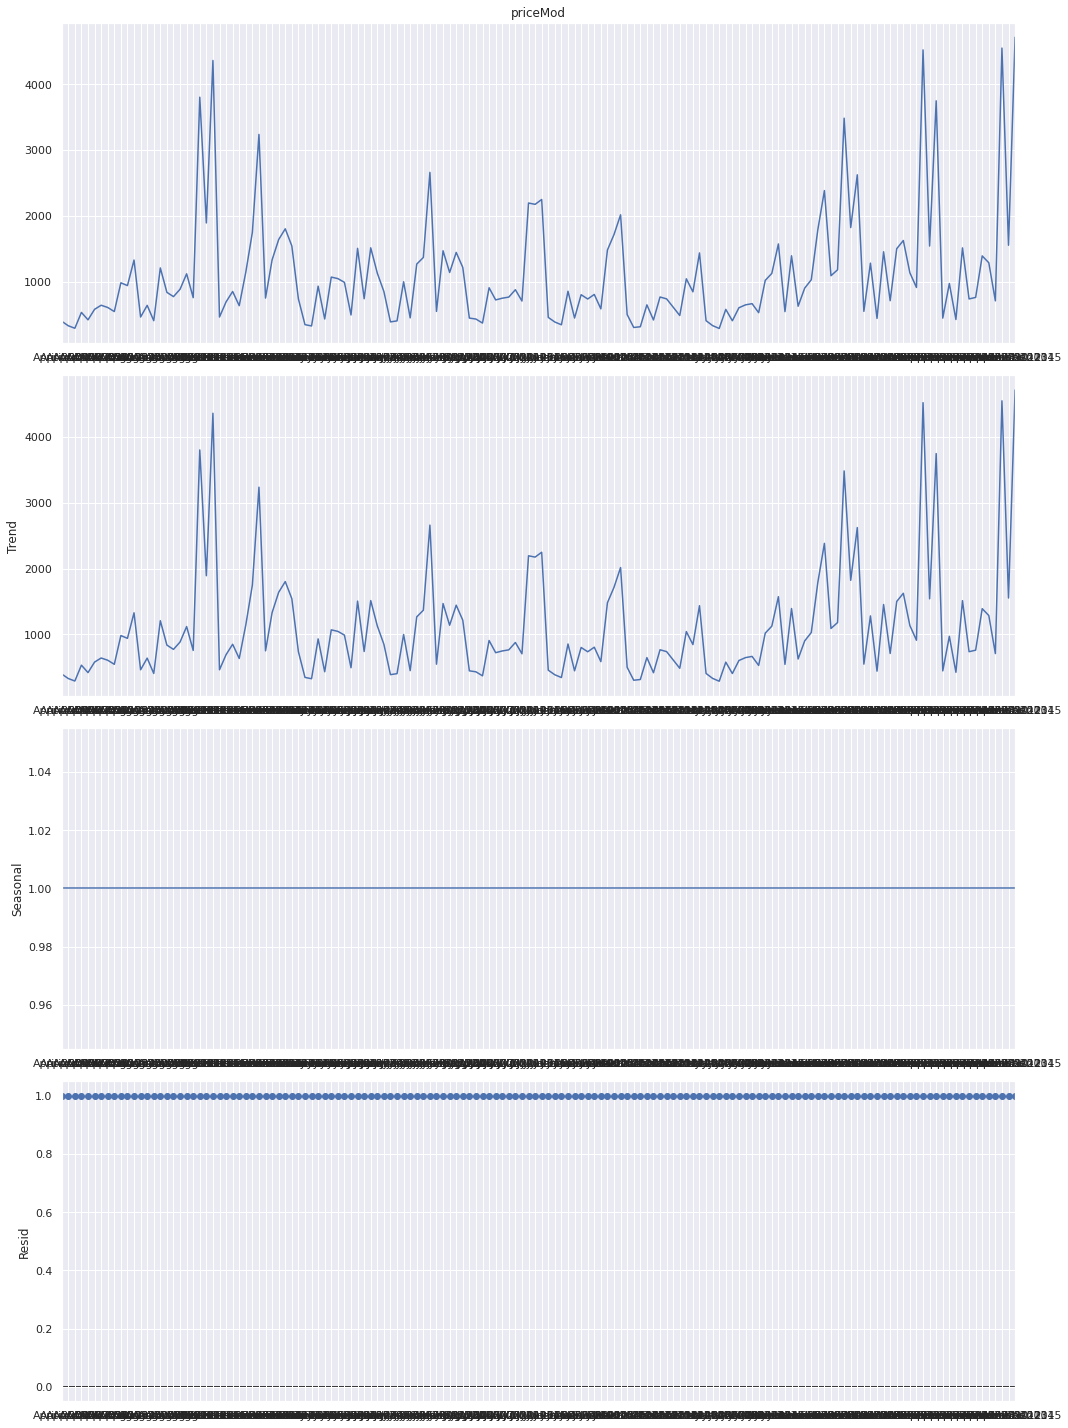

In [347]:
# Decompose the data frame to get the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df2020_mum['priceMod'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

# **Q1Modal price of onion for each month for the Mumbai market**

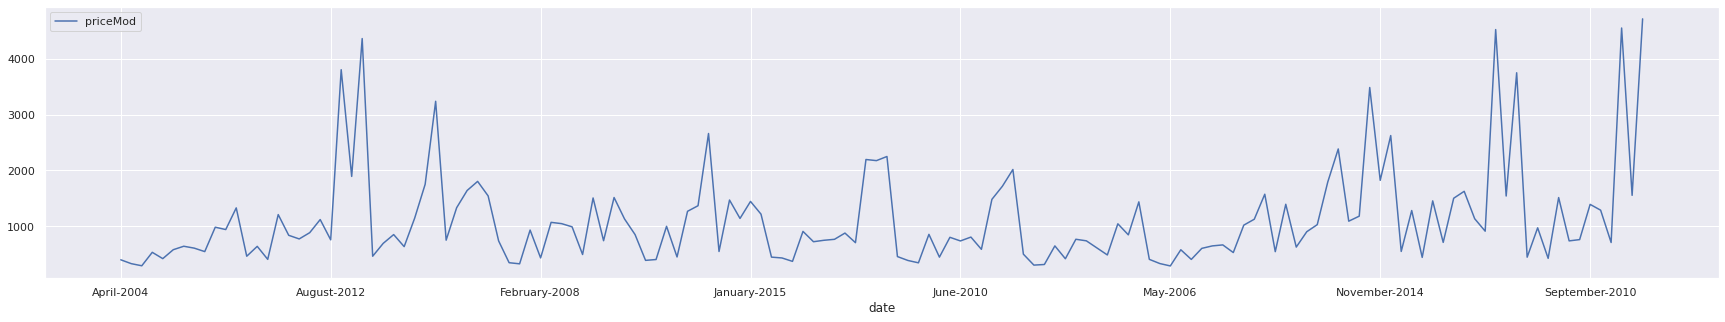

In [349]:
df2020_mum.plot(kind="line", y=["priceMod"],figsize=[30,5])
plt.show()

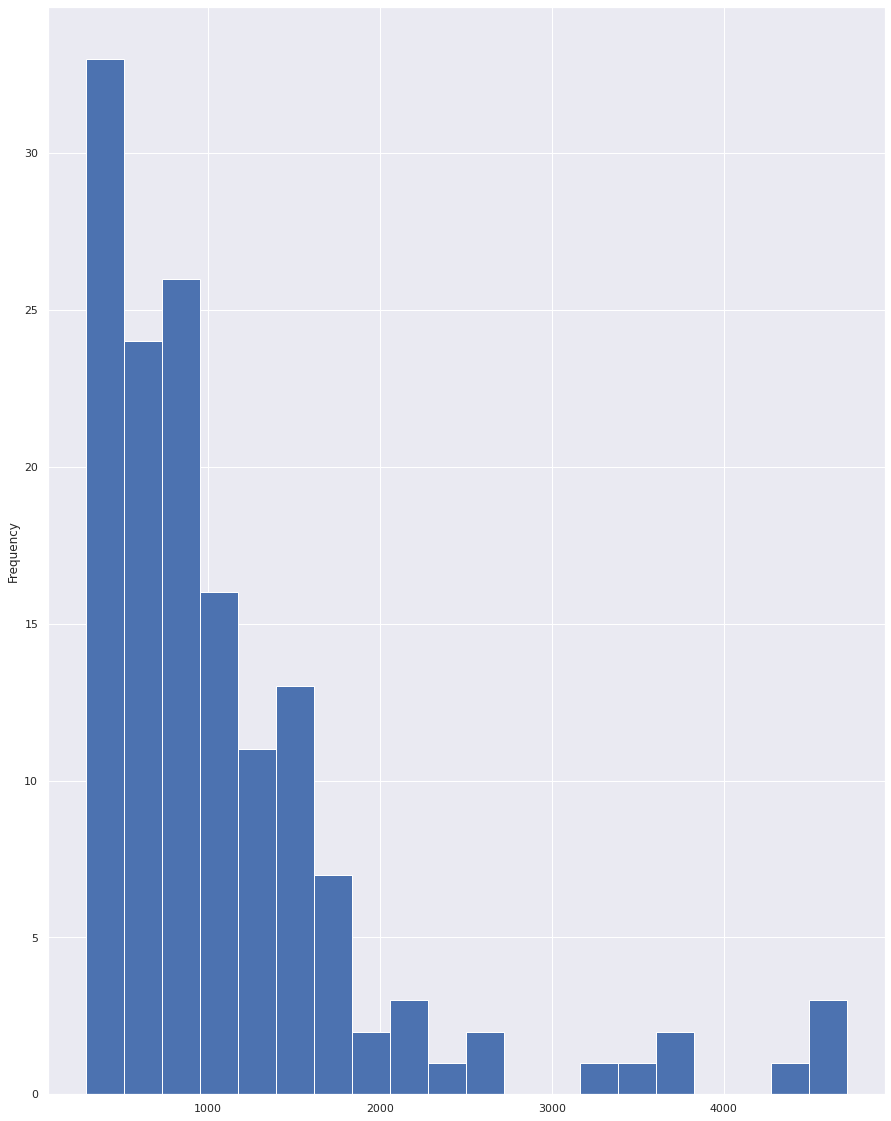

In [351]:
df2020_mum.priceMod.plot(kind="hist", bins=20)

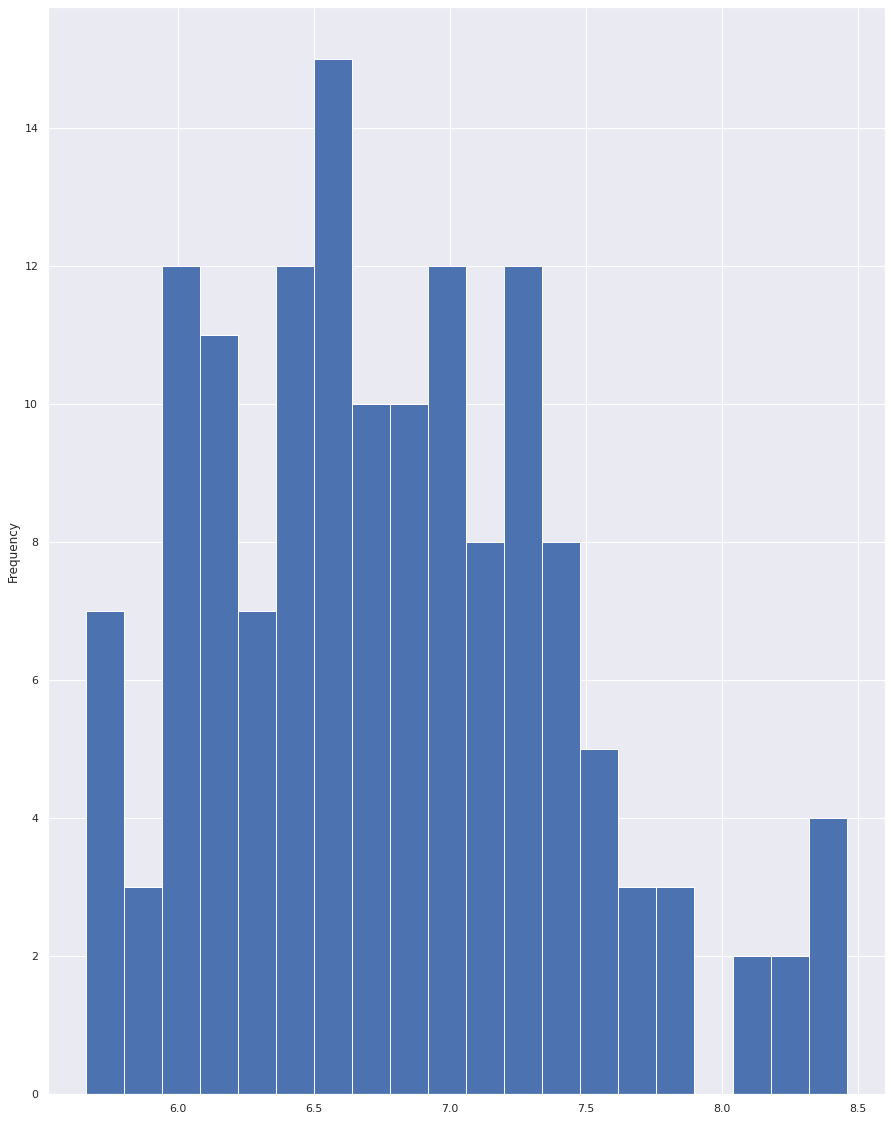

In [353]:
df2020_mum["log_modal_price"] = np.log(df2020_mum.priceMod)
df2020_mum.log_modal_price.plot(kind="hist", bins=20)

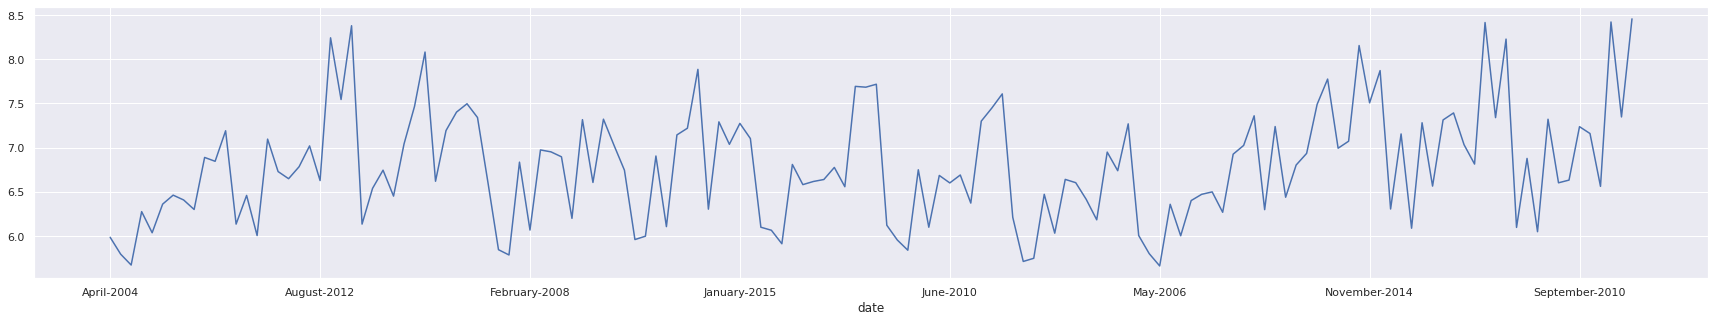

In [354]:
df2020_mum.log_modal_price.plot(figsize=[30,5])

# **Q2Building a time series model **

In [355]:
df2020_mum.head()

,priceMod,log_modal_price
date,,
April-2004,397,6
April-2005,328,6
April-2006,290,6
April-2007,531,6
April-2008,418,6


In [356]:
x=df2020_mum.index.copy()

In [357]:
df2020_mum.date = x

<ipython-input-357-06e184a52654>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2020_mum.date = x


In [358]:
df2020_mum.head()

,priceMod,log_modal_price
date,,
April-2004,397,6
April-2005,328,6
April-2006,290,6
April-2007,531,6
April-2008,418,6


In [361]:
df2020_mum.date = pd.DatetimeIndex(df2020_mum.date)


In [362]:
df2020_mum["timeindex"] = df2020_mum.date - df2020_mum.date.min()
df2020_mum.head()

,priceMod,log_modal_price,timeindex
date,,,
April-2004,397,6,91 days
April-2005,328,6,456 days
April-2006,290,6,821 days
April-2007,531,6,1186 days
April-2008,418,6,1552 days


In [363]:
df2020_mum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, April-2004 to September-2015
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   priceMod         146 non-null    int64          
 1   log_modal_price  146 non-null    float64        
 2   timeindex        146 non-null    timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 8.6+ KB


In [364]:
df2020_mum["timeindex"] = df2020_mum["timeindex"]/np.timedelta64(1,"D")
df2020_mum.head()

,priceMod,log_modal_price,timeindex
date,,,
April-2004,397,6,91
April-2005,328,6,456
April-2006,290,6,821
April-2007,531,6,1186
April-2008,418,6,1552


In [365]:
df2020_mum["timeindex"] = df2020_mum["timeindex"].round(0).astype(int)
df2020_mum

,priceMod,log_modal_price,timeindex
date,,,
April-2004,397,6,91
April-2005,328,6,456
April-2006,290,6,821
April-2007,531,6,1186
April-2008,418,6,1552
...,...,...,...
September-2011,1286,7,2800
September-2012,707,7,3166
September-2013,4550,8,3531


In [366]:
import statsmodels.formula.api as smf
linear_model = smf.ols('log_modal_price ~ timeindex', data = df2020_mum).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_modal_price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     129.3
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           8.75e-22
Time:                        08:14:44   Log-Likelihood:                -96.105
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.077     77.799      0.000       5.875       6.182
timeindex      0.0003   3.04e-05     11.372      0.000       0.000       0.000
==============================================================================
Omnibus:                        7.655   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.052
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.792   Cond. No.                     5.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [367]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.05981325, 6.18583873, 6.3118642 , 6.43788968, 6.56426043,
       6.6902859 , 6.81631138, 6.94233685, 7.0687076 , 7.19473308,
       7.32075855, 7.44678403, 6.10193683, 6.22796231, 6.35398778,
       6.48001326, 6.60638401, 6.73240948, 6.85843496, 6.98446043,
       7.11083118, 7.23685666, 7.36288213, 7.48890761, 6.14406042,
       6.27008589, 6.39611137, 6.52213684, 6.64850759, 6.77453307,
       6.90055854, 7.02658402, 7.15295477, 7.27898024, 7.40500572,
       7.53103119, 6.03909673, 6.16546748, 6.29149296, 6.41751843,
       6.54354391, 6.66991466, 6.79594013, 6.92196561, 7.04799108,
       7.17436183, 7.30038731, 7.42641278, 7.55243826, 6.0283932 ,
       6.15476395, 6.28078943, 6.4068149 , 6.53284038, 6.65921113,
       6.7852366 , 6.91126208, 7.03728755, 7.1636583 , 7.28968378,
       7.41570925, 7.54173473, 6.0912333 , 6.21725878, 6.34328425,
       6.46930973, 6.59568048, 6.72170595, 6.84773143, 6.9737569 ,
       7.10012765, 7.22615313, 7.3521786 , 7.47820408, 6.08087

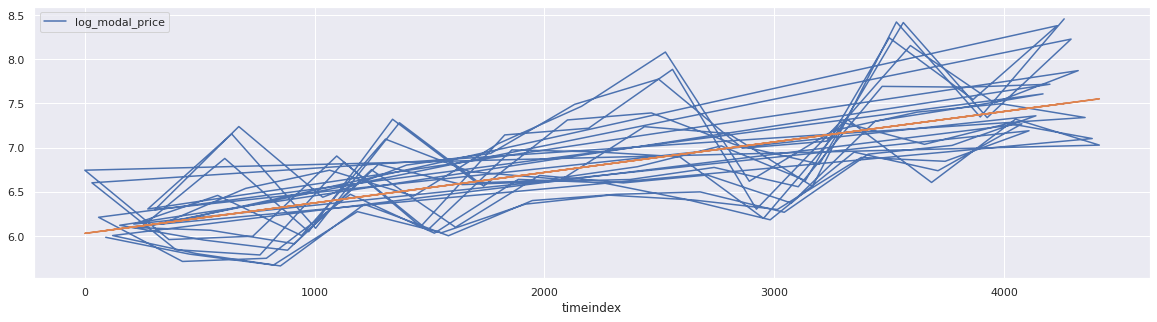

In [368]:
df2020_mum.plot(kind = "line", x="timeindex", y="log_modal_price", figsize=[20,5])
plt.plot(df2020_mum.timeindex, linear_model_pred)

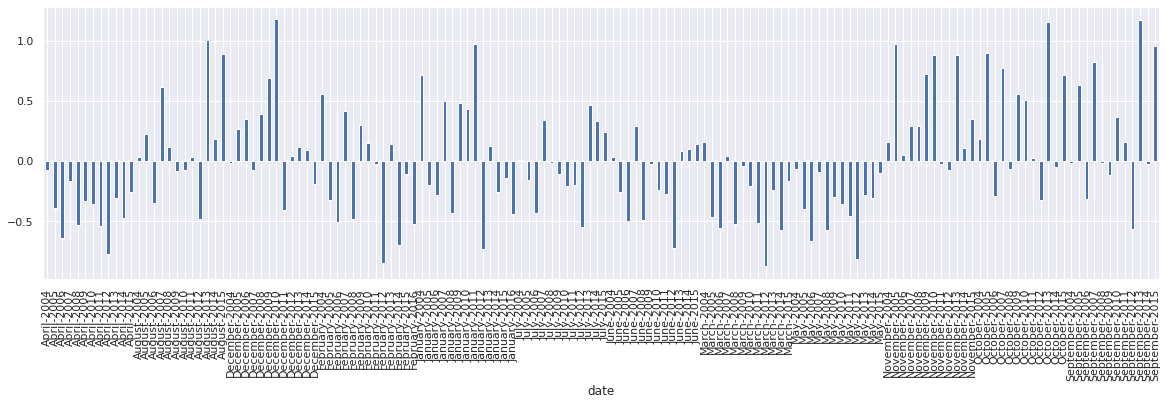

In [369]:
linear_model.resid.plot(kind="bar", figsize=[20,5])

Evaluate the model using **RMSE**

In [370]:
df2020_mum["linear_price"] = np.exp(linear_model_pred)
df2020_mum.head()

,priceMod,log_modal_price,timeindex,linear_price
date,,,,
April-2004,397,6,91,428
April-2005,328,6,456,486
April-2006,290,6,821,551
April-2007,531,6,1186,625
April-2008,418,6,1552,709


In [371]:
df2020_mum_dummy= df2020_mum.set_index('timeindex')
df2020_mum_dummy.head()

,priceMod,log_modal_price,linear_price
timeindex,,,
91,397,6,428
456,328,6,486
821,290,6,551
1186,531,6,625
1552,418,6,709


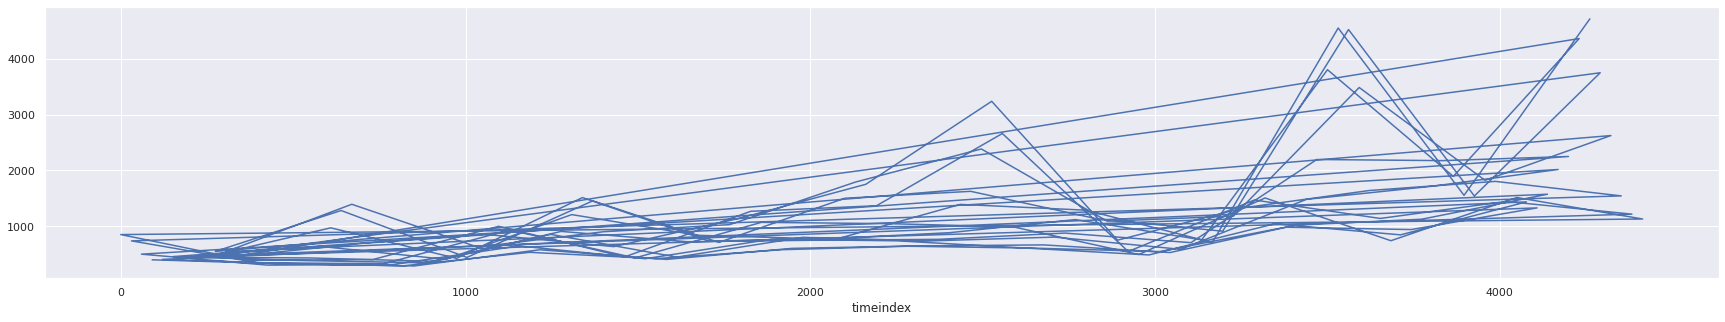

In [373]:
df2020_mum_dummy.priceMod.plot(figsize=[30,5])

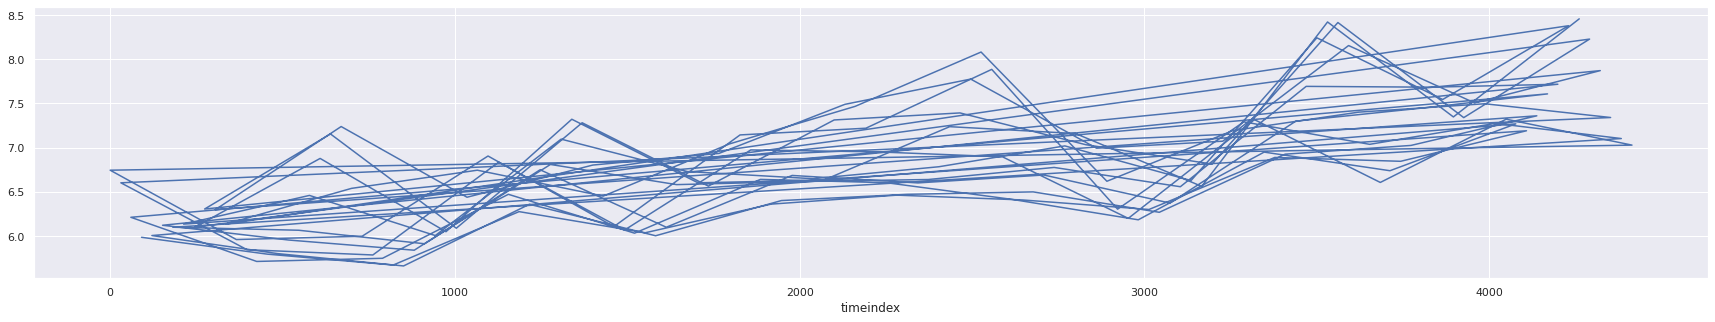

In [374]:
df2020_mum_dummy.log_modal_price.plot(figsize=[30,5])

In [375]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [376]:
linear_model_RMSE = RMSE(df2020_mum.priceMod, df2020_mum.linear_price)
linear_model_RMSE

724.6662938231526

# **Plotting ACF & PACF Plots**

In [377]:
df2020_mum.head()

,priceMod,log_modal_price,timeindex,linear_price
date,,,,
April-2004,397,6,91,428
April-2005,328,6,456,486
April-2006,290,6,821,551
April-2007,531,6,1186,625
April-2008,418,6,1552,709


In [378]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [380]:
adf_test(df2020_mum['priceMod'])

ADF Statistics: -1.8453551708229816
p- value: 0.3581877525306041
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


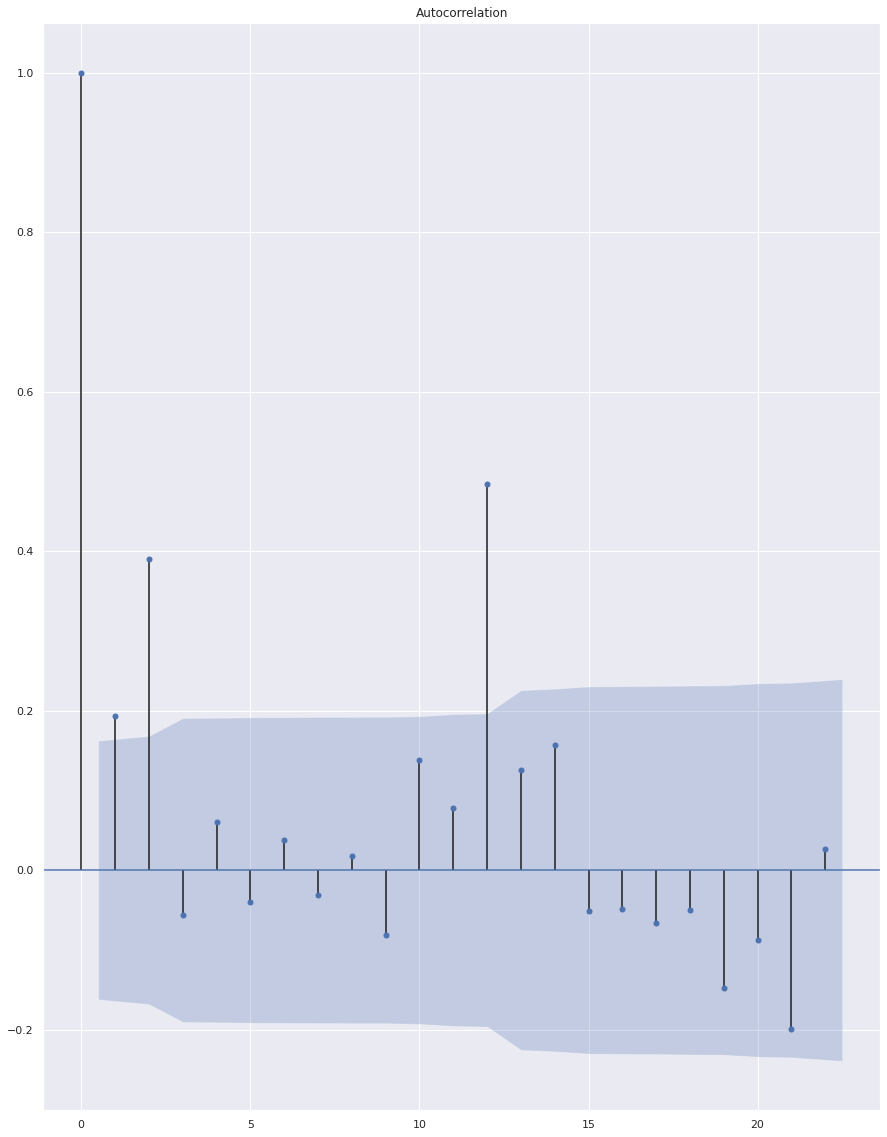

In [382]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df2020_mum["priceMod"].dropna())

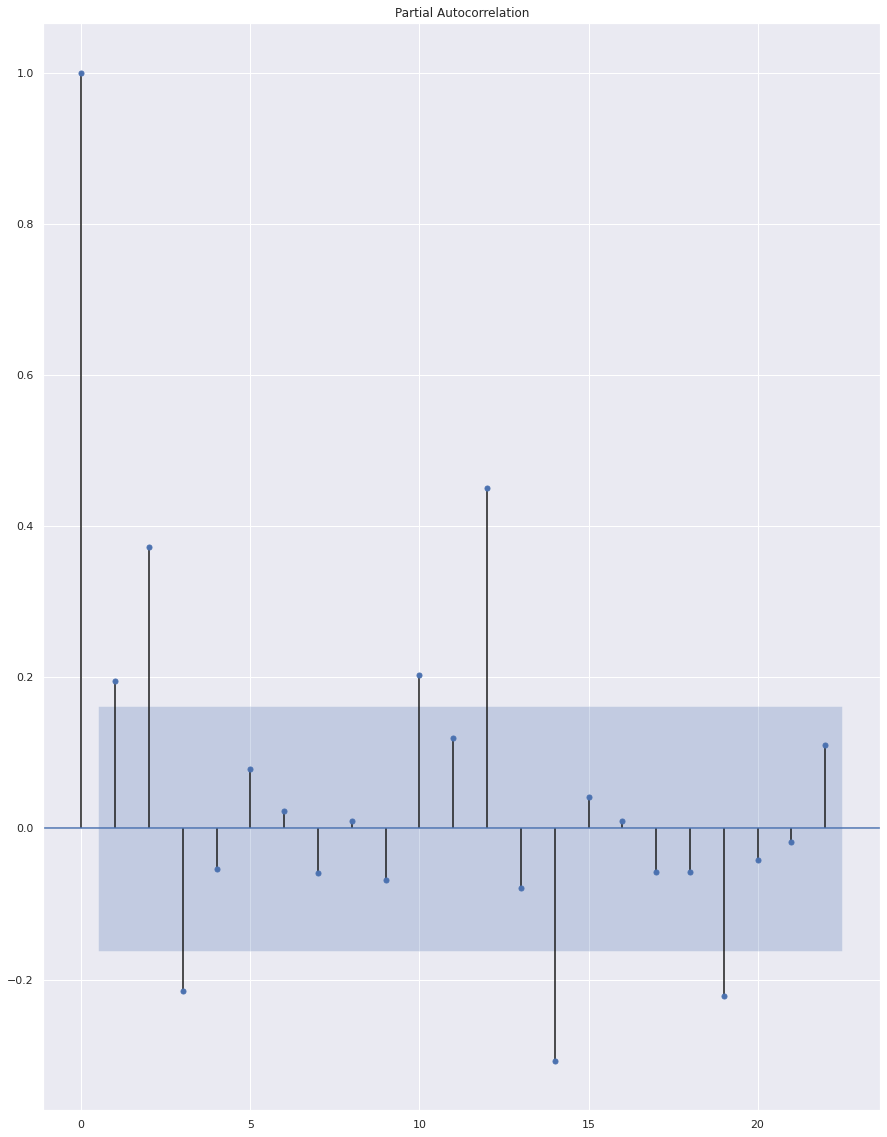

In [383]:
pacf = plot_pacf(df2020_mum["priceMod"].dropna())

In [384]:
adf_test(df2020_mum['log_modal_price'])

ADF Statistics: -2.202795365236932
p- value: 0.20523246537250683
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


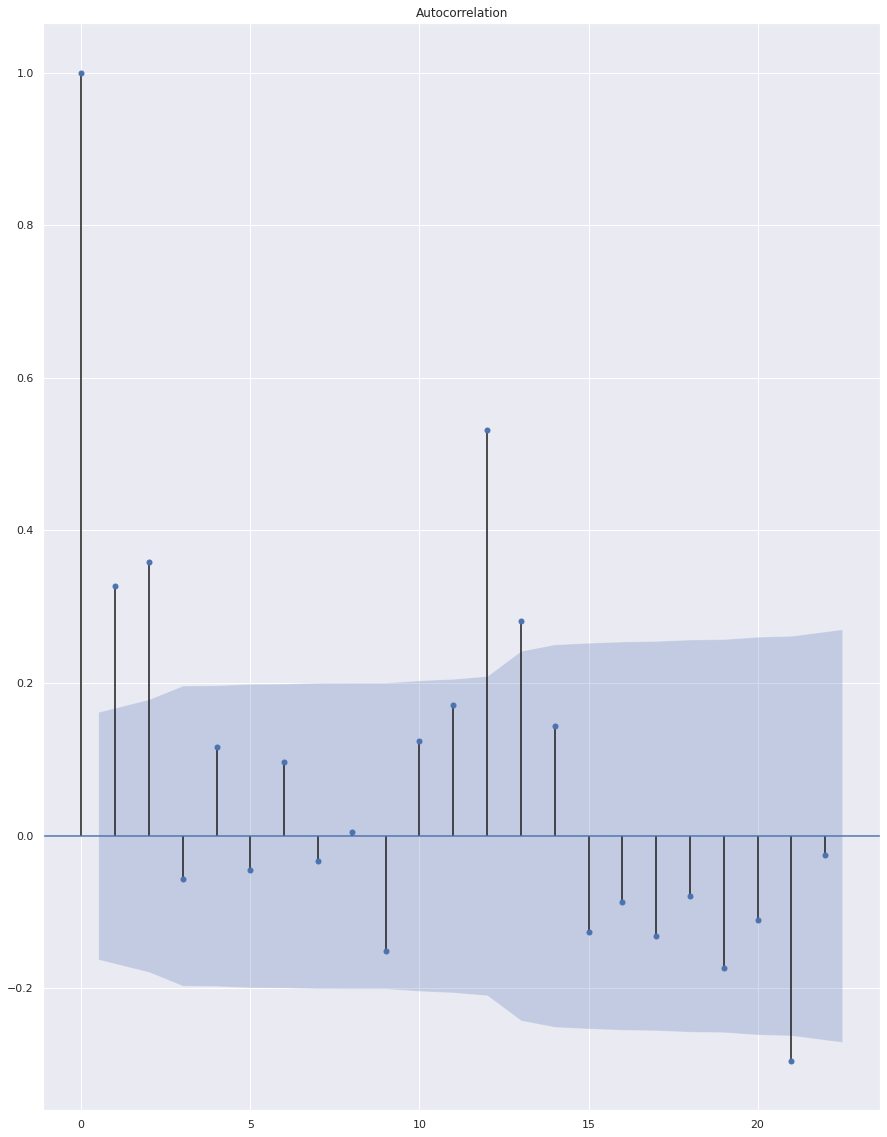

In [385]:
acf = plot_acf(df2020_mum["log_modal_price"].dropna())

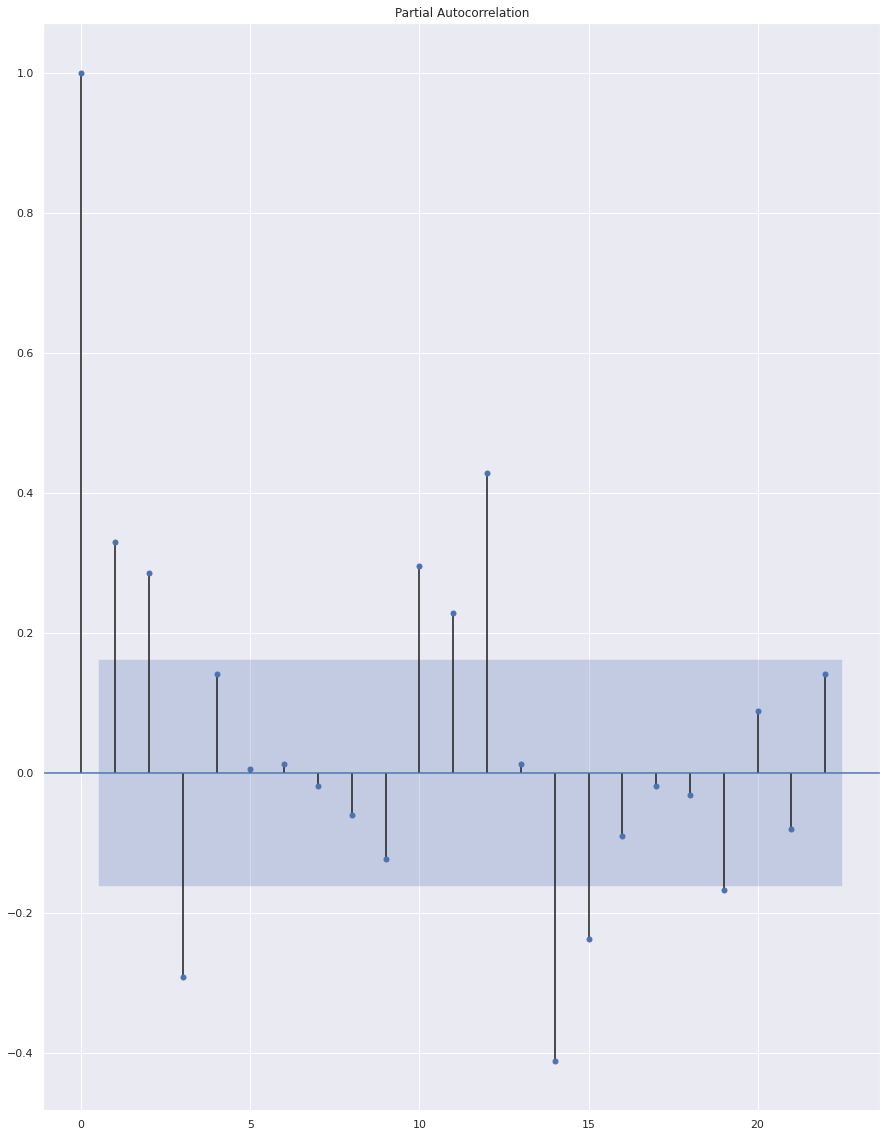

In [386]:
pacf = plot_pacf(df2020_mum["log_modal_price"].dropna())

# **Q4. performing exponential smoothing using Holt-Winter’s technique**

In [387]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [388]:
x = 12
alpha = 1/(2*x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/lo

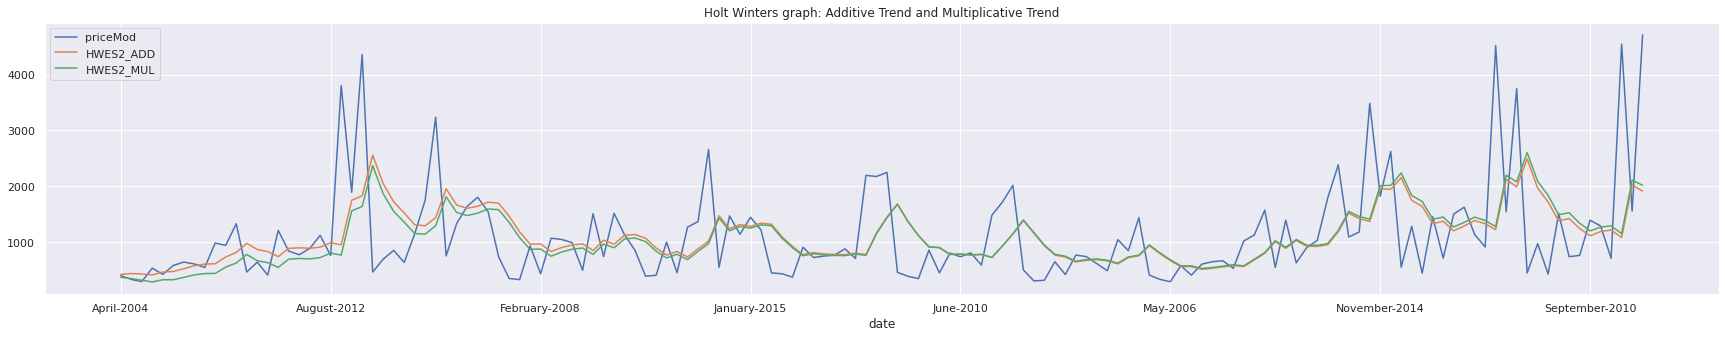

In [389]:
df2020_mum['HWES2_ADD'] = ExponentialSmoothing(df2020_mum['priceMod'],trend='add').fit().fittedvalues
df2020_mum['HWES2_MUL'] = ExponentialSmoothing(df2020_mum['priceMod'],trend='mul').fit().fittedvalues
df2020_mum[['priceMod','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters graph: Additive Trend and Multiplicative Trend',figsize=[30,5])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/lo

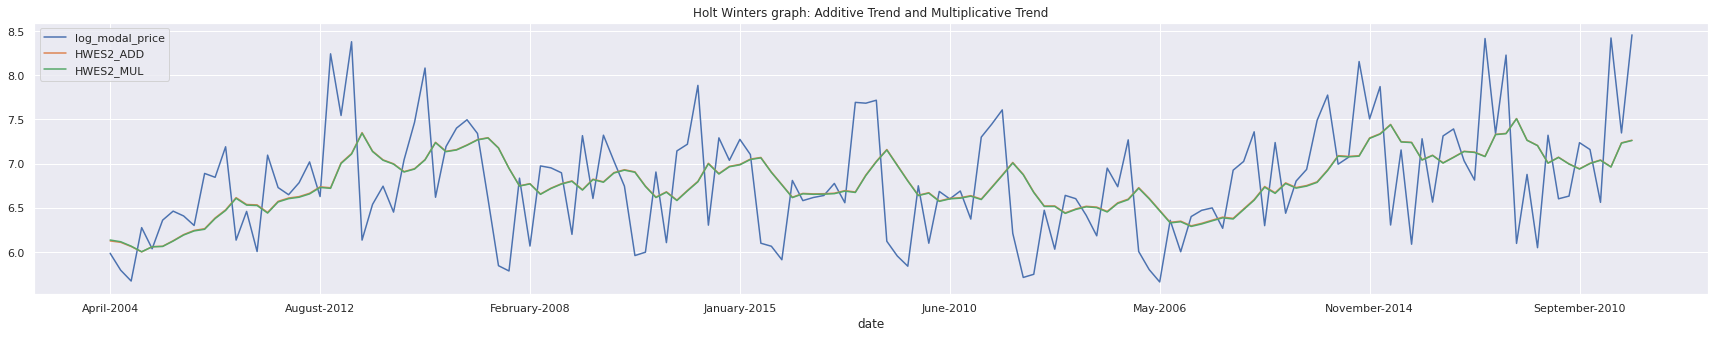

In [390]:
df2020_mum['HWES2_ADD'] = ExponentialSmoothing(df2020_mum['log_modal_price'],trend='add').fit().fittedvalues
df2020_mum['HWES2_MUL'] = ExponentialSmoothing(df2020_mum['log_modal_price'],trend='mul').fit().fittedvalues
df2020_mum[['log_modal_price','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters graph: Additive Trend and Multiplicative Trend',figsize=[30,5])

In [391]:
df2020_mum.head(2)

,priceMod,log_modal_price,timeindex,linear_price,HWES2_ADD,HWES2_MUL
date,,,,,,
April-2004,397,6,91,428,6,6
April-2005,328,6,456,486,6,6


In [392]:
df2020_mum=df2020_mum.drop(['log_modal_price','timeindex','linear_price','HWES2_ADD','HWES2_MUL'],axis=1)

In [393]:
df2020_mum

,priceMod
date,
April-2004,397
April-2005,328
April-2006,290
April-2007,531
April-2008,418
...,...
September-2011,1286
September-2012,707
September-2013,4550


In [394]:
train_df2020_mum =df2020_mum[:-25]
test_df2020_mum = df2020_mum[-25:]

In [395]:
model = ExponentialSmoothing(train_df2020_mum, seasonal_periods=25, trend='add', seasonal='mul')
fitted = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [396]:
sales_forecast = fitted.forecast(steps=25)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


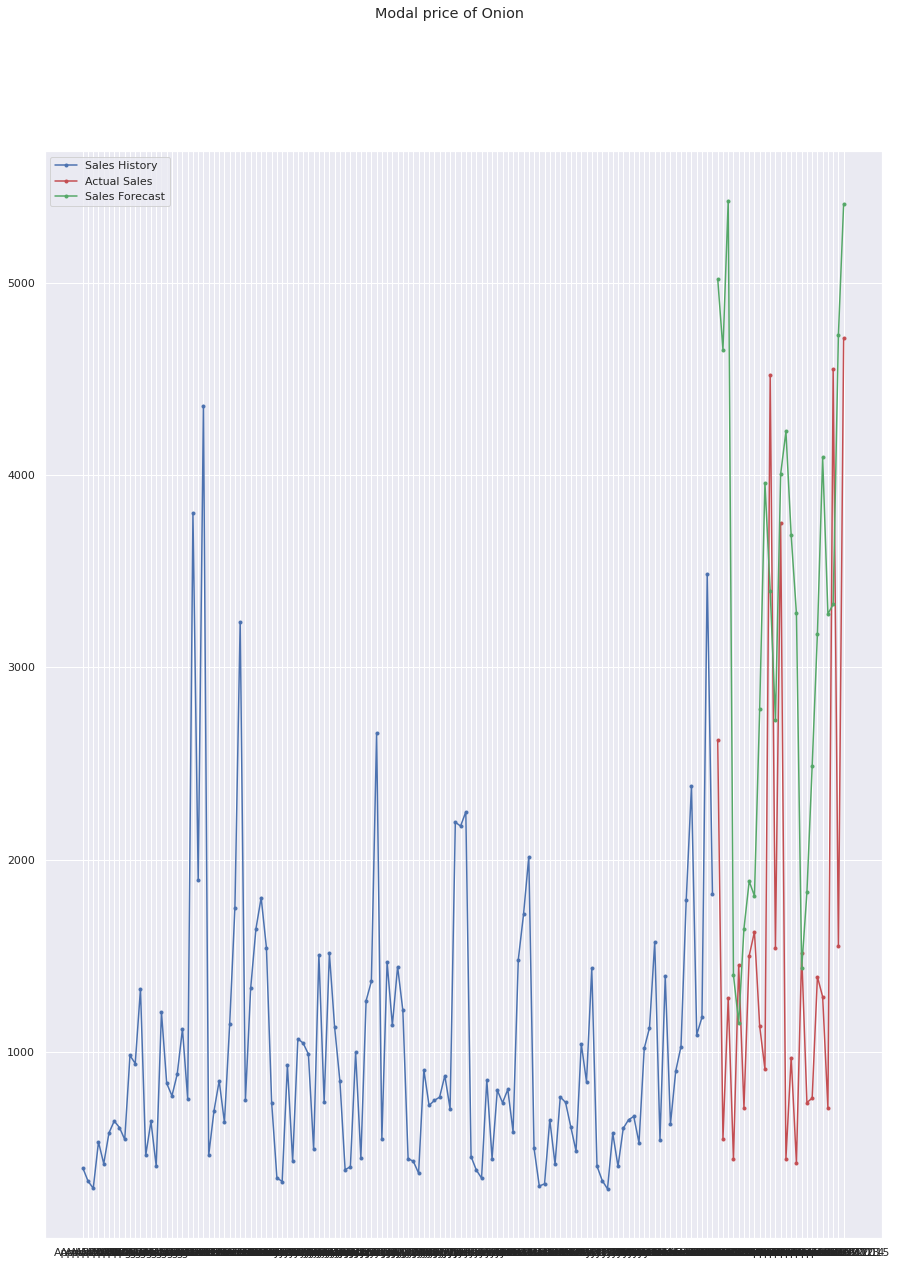

In [397]:
fig = plt.figure()
fig.suptitle('Modal price of Onion')
past, = plt.plot(train_df2020_mum.index, train_df2020_mum, 'b.-', label='Sales History')
future, = plt.plot(test_df2020_mum.index, test_df2020_mum, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(test_df2020_mum.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()